<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_sklearn/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
"""
1. criterion

1.1 通常使用使用基尼系数
1.2 数据维度很大，噪声很大时用Gini系数
1.3 维数低，数据比较清晰时，两者区别不大
1.4 决策树欠拟合，使用信息熵（entropy）

"""
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine()

In [73]:
wine.data.shape

(178, 13)

In [74]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [75]:
wine.feature_names


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [76]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [77]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3) # 顺序一定是X,X,Y,Y
# 随机划分数据集，结果准确率可能会不一样

In [78]:
Xtrain.shape, Xtest.shape

((124, 13), (54, 13))

In [79]:
# 实例化
clf = tree.DecisionTreeClassifier(criterion="entropy")
# 训练(fit)
clf = clf.fit(Xtrain,Ytrain)
# 评价
score = clf.score(Xtest,Ytest) # 返回的是预测的准确度

In [80]:
score

0.9444444444444444

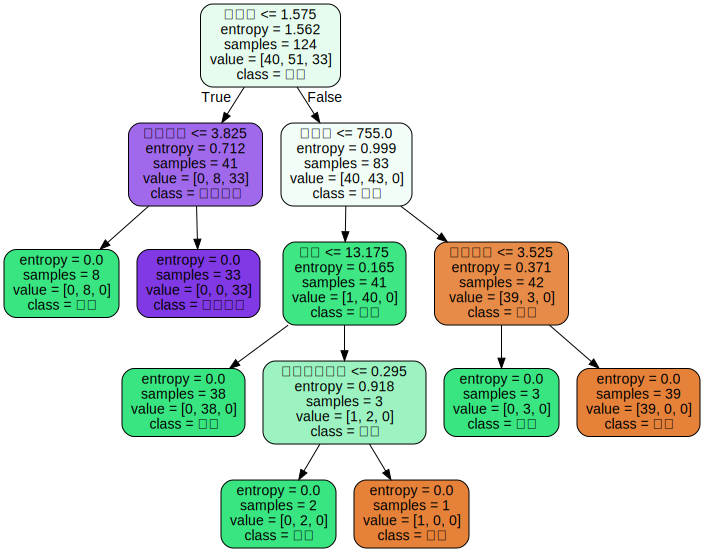

In [83]:
from numpy import source
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz
dot_data = tree.export_graphviz(clf
                  ,feature_names=feature_name # 特征的名称
                  ,class_names=["琴酒","雪莉","贝尔摩德"] # 类的名称
                  ,filled=True # 是否填充颜色
                  ,rounded=True) # 框型是否是方的
graph = graphviz.Source(dot_data)
graph

In [84]:
clf.feature_importances_  # 每个特征的重要性不同

array([0.02079475, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.42113913, 0.01422358, 0.        , 0.23123368,
       0.        , 0.        , 0.31260887])

In [85]:
[*zip(feature_name, clf.feature_importances_)]  # 把数组和特征名称联系在一起了，元组类型

[('酒精', 0.020794748517705883),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.42113912550481797),
 ('非黄烷类酚类', 0.01422358120158506),
 ('花青素', 0.0),
 ('颜色强度', 0.23123367782324228),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.3126088669526488)]

In [86]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest) 
score

0.9444444444444444

In [109]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                  ,random_state=60
                  ,splitter="random"
                 )
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest) 
score

0.9444444444444444

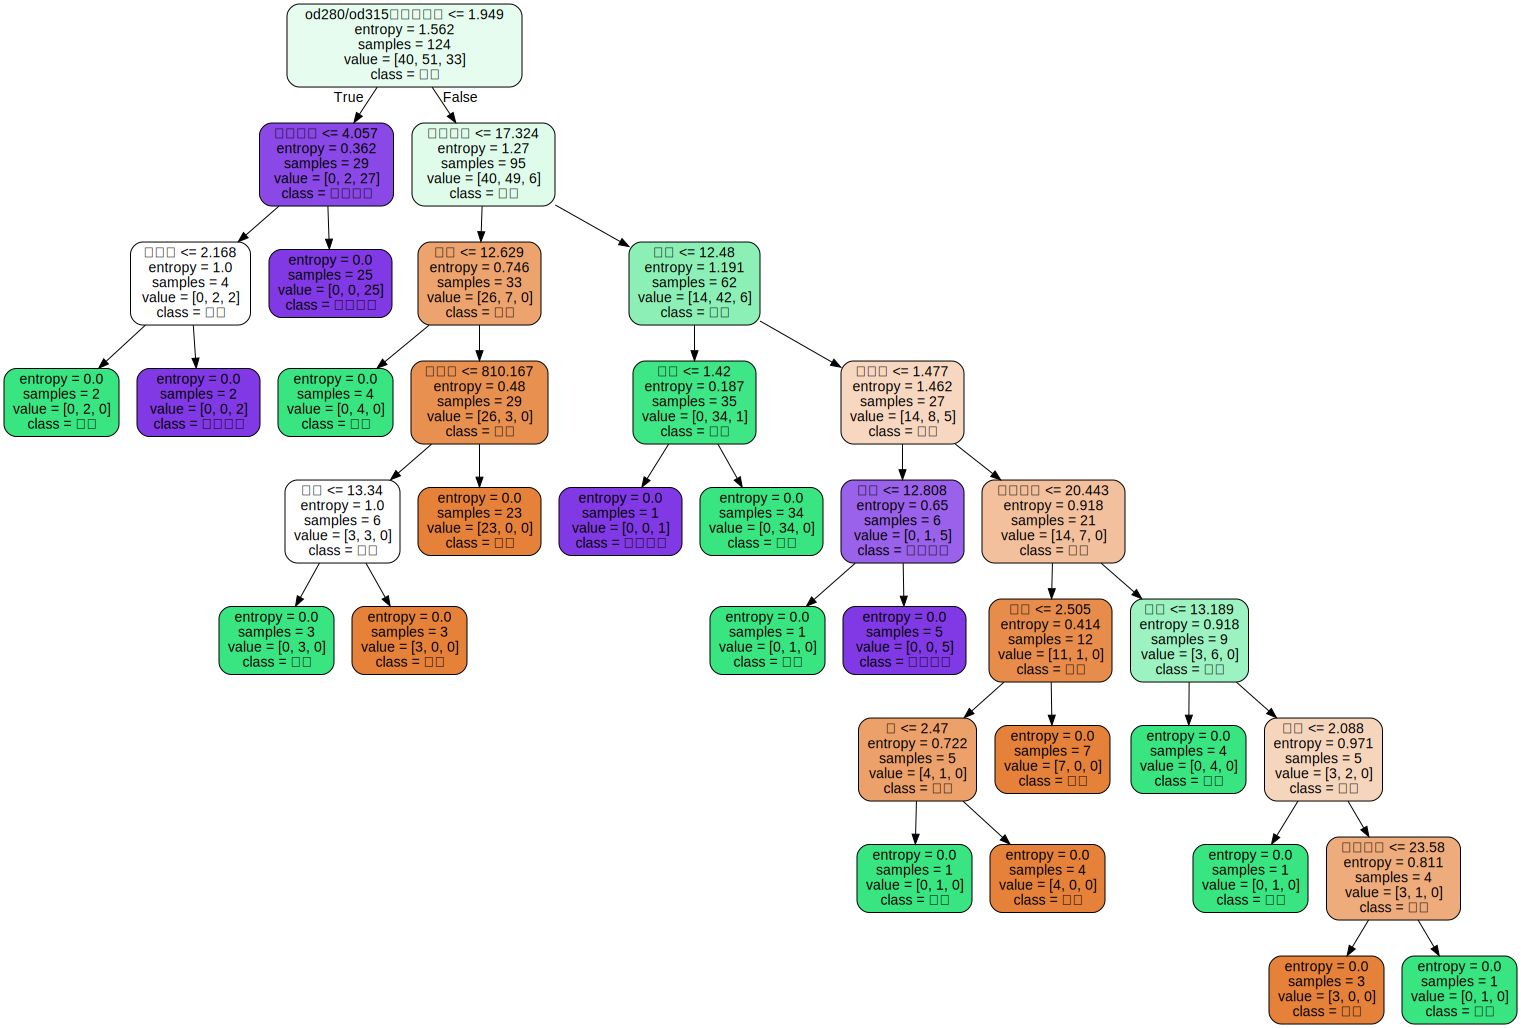

In [110]:
import graphviz
dot_data = tree.export_graphviz(clf
                  ,feature_names=feature_name # 特征的名称
                  ,class_names=["琴酒","雪莉","贝尔摩德"] # 类的名称
                  ,filled=True # 是否填充颜色
                  ,rounded=True) # 框型是否是方的)
graph = graphviz.Source(dot_data)
graph

In [111]:
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

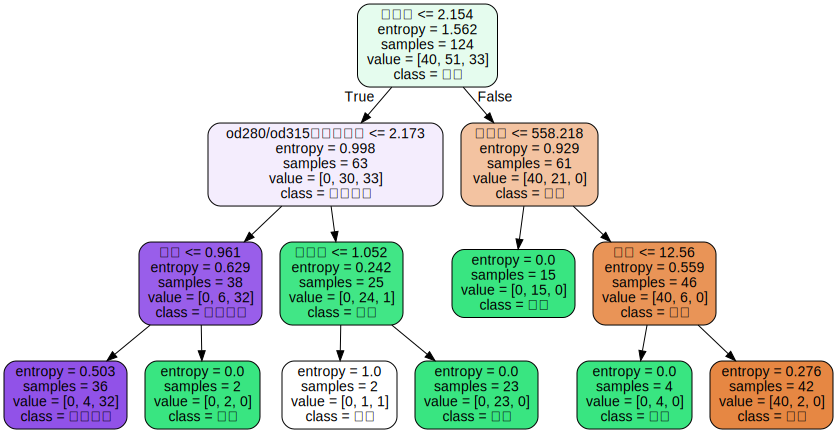

In [121]:
clf = tree.DecisionTreeClassifier(criterion="entropy"             
                    ,random_state=30
                    ,splitter="random"
                    ,max_depth=3
                   # ,min_samples_leaf=10
                   # ,min_samples_split=10
              )
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
,feature_names= feature_name
,class_names=["琴酒","雪莉","贝尔摩德"]
,filled=True
,rounded=True
)
graph = graphviz.Source(dot_data)
graph

In [122]:
score = clf.score(Xtest,Ytest)
score

0.9814814814814815

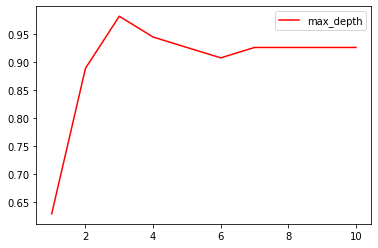

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

test = []
for i in range(10):
  clf = tree.DecisionTreeClassifier(
      max_depth = i+1
      ,criterion="entropy"
      ,random_state=30
      ,splitter="random"
  )
  clf = clf.fit(Xtrain, Ytrain)
  score = clf.score(Xtest, Ytest)
  test.append(score)
plt.plot(range(1,11),test,color='red',label='max_depth')
plt.legend()
plt.show()

In [127]:
clf.apply(Xtest) # 不应输入Ytest

array([28,  4, 28, 14, 27, 24, 28,  4,  4, 14,  4, 16, 19, 16, 21, 28, 13,
       27, 27, 21, 14, 28, 19,  4, 28,  7,  4, 10, 28, 28, 28, 28, 16,  4,
       21, 28, 16, 21, 12, 28, 16,  4, 16, 28,  7, 21, 21, 24, 16, 16, 24,
       28,  4, 21])

In [129]:
clf.predict(Xtest) # 不应输入Ytest

array([0, 2, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0,
       2, 1, 1, 1, 1, 1, 1, 0, 2, 1])